<a href="https://colab.research.google.com/github/satymshrma/image-text-extraction/blob/main/Image_Text_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Text Extraction
[*Using Tesseract OCR*](https://github.com/tesseract-ocr/)

by Satyam Sharma, Graphic Era Deemed University, B.Tech CSE(ML&AI), 5th Semester, Section - ML, Class Roll no. - 25, Un. Roll no. - 2013593

#### Introduction

Computer vision has come a long way.
These days, using machine learning, computers can do amazing things, uncomprehendable a few decades back. Such as extracting text from images. The machines used to perform this perticular task are often referred to as OCRs(Optical character recognition). This mini project also aims to showcase on such a technology.

**Components used in the building of the project -**


#### Tesseract OCR

Tesseract is an open source text recognition (OCR) Engine, available under the Apache 2.0 license. It was initially developed by HP as a tool in C++. Since 2006 it is developed by Google.
Its one of the oldest and most famous, if the most famous open source OCR out there. 

It is the main technology showcased in this project and the library on which this project is based on.

It uses two-step approach that calls adaptive recognition. It requires one data stage for character recognition, then the second stage to fulfil any letters, it wasn’t insured in, by letters that can match the word or sentence context.

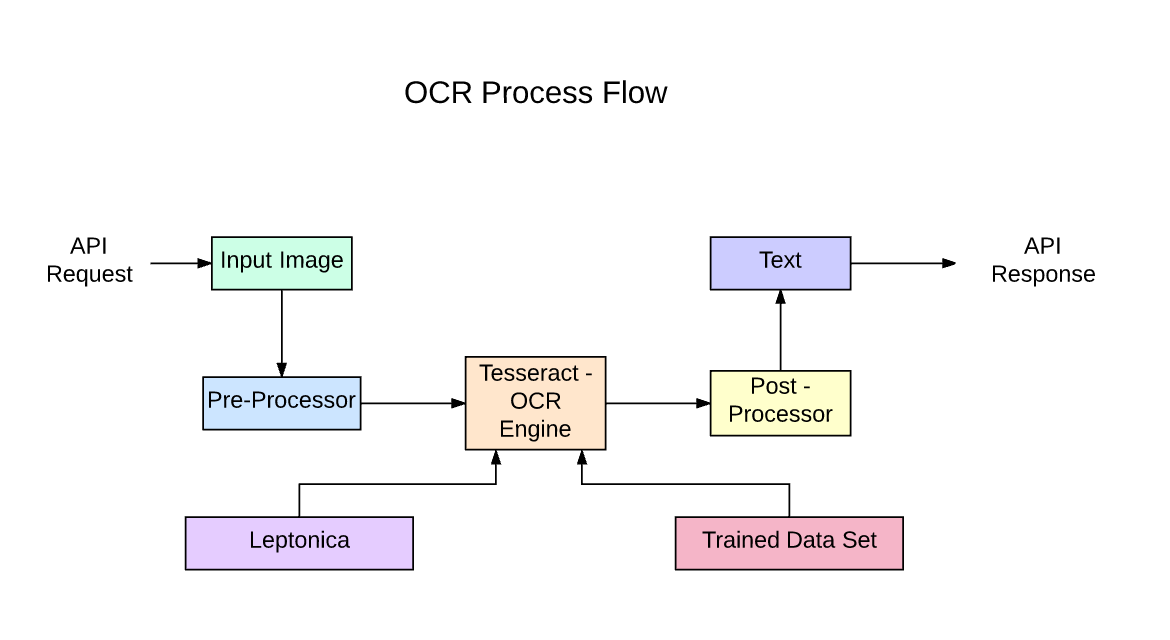

The better the image quality (size, contrast, lightning) the better the recognition result.

Some of its pros and cons :-

Pros:
- Easy to use
- Fast Detection
- Most Popular
- Most efficient
- Support 100+ Language
- Oldest OCR Library
- Command-line support

Cons:
- Only works on CPU
- Doesn’t perform well on Blur, Noisy and colorful image
- Performance decrease for lower font size in low-resolution images
- Doesn’t work well on complex Forms

#### CV2

OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products.
The library has more than 2500 optimized algorithms, which includes a comprehensive set of both classic and state-of-the-art computer vision and machine learning algorithms.
Here it is used as a supporting library, to store the image data, and then process it. Cv2 library has a lot of other usecases, but for this project, we shall limit ourself to these functions only.

---
Now, let us look at the code.

First, we shall install the required components, like the tesseract itself

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,490 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

Then let us import the required libraries into our code

In [ ]:
import cv2
import pytesseract
import numpy as np

For a test, let us store this simple image file as an object. 


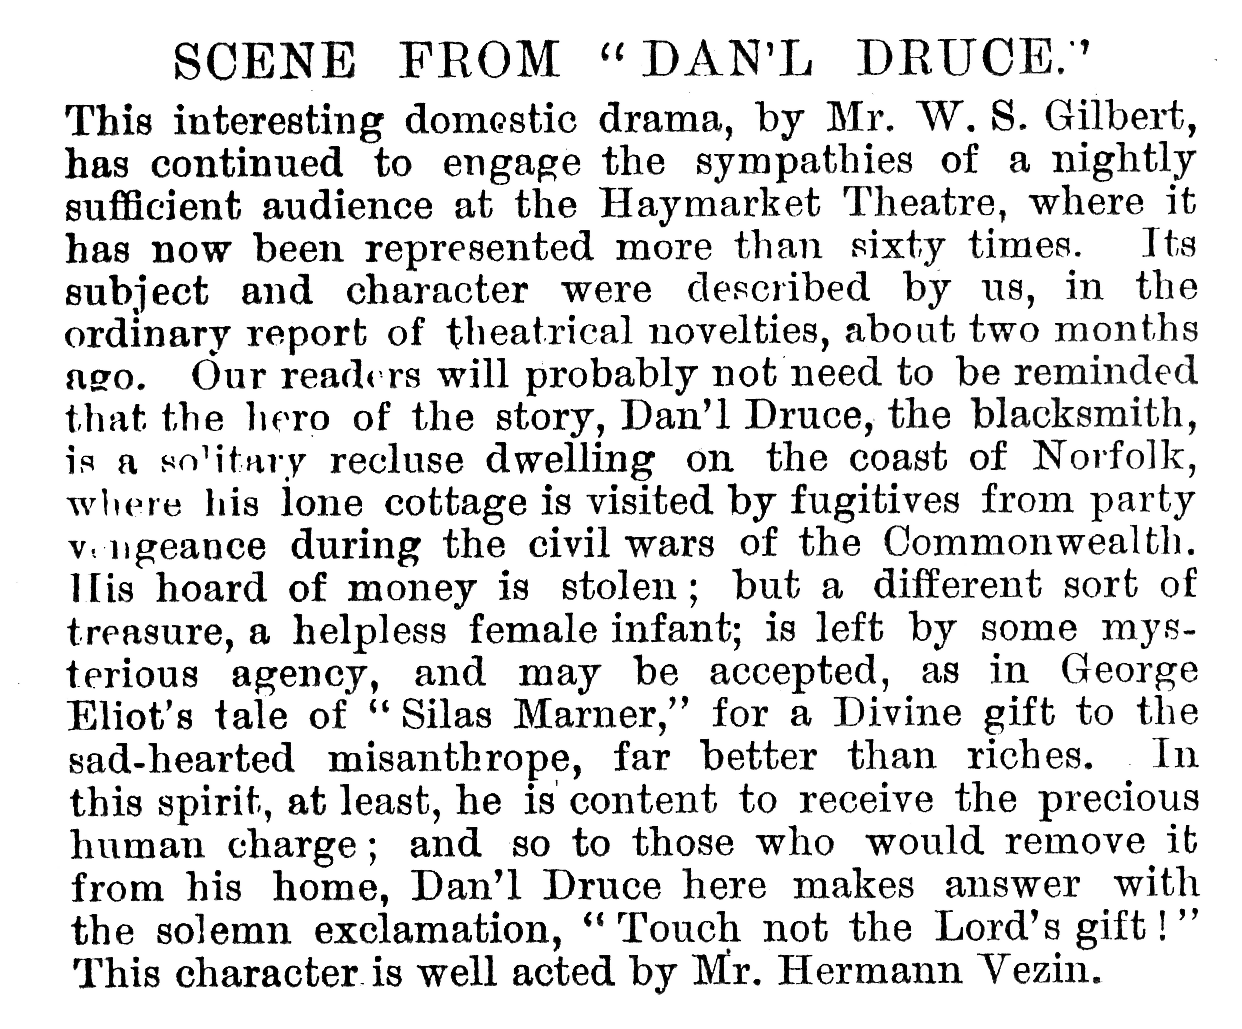

Then make the tesseract work on it and observe the result.

In [ ]:
img = cv2.imread('text.png')

In [ ]:
custom_config = r'--oem 3 --psm 6'
print(pytesseract.image_to_string(img, config=custom_config))

SCENE FROM “DAN'’L DRUCE.’
This interesting domestic drama, by Mr. W. 8. Gilbert,
has continued to engage the sympathies of a nightly
sufficient audience at the Haymarket Theatre, where it
has now been represented more than sixty times. Its
subject and character were described by us, in the
ordinary report of theatrical novelties, about two months
ago. Our readers will probably not need to be reminded
that the hero of the story, Dan’l Druce, the blacksmith,
is a solitary recluse dwelling on the coast of Norfolk,
where his lone cottage is visited by fugitives from party
v.ngeance during the civil wars of the Commonwealth.
Ifis hoard of money is stolen; but a different sort of
treasure, a helpless female infant; is left by some mys-
terious agency, and may be accepted, as in George
Eliot’s tale of “Silas Marner,’ for a Divine gift to the
gad-hearted misanthrope, far better than riches. . In
this spirit, at least, he is content to receive the precious
human charge; and so to those who wou

---
And there you have it. The test run was a success & the tesseract OCR is functional within our code.

Tesseract can also be used to transcribe images with text in languages other then English. For example, french - 

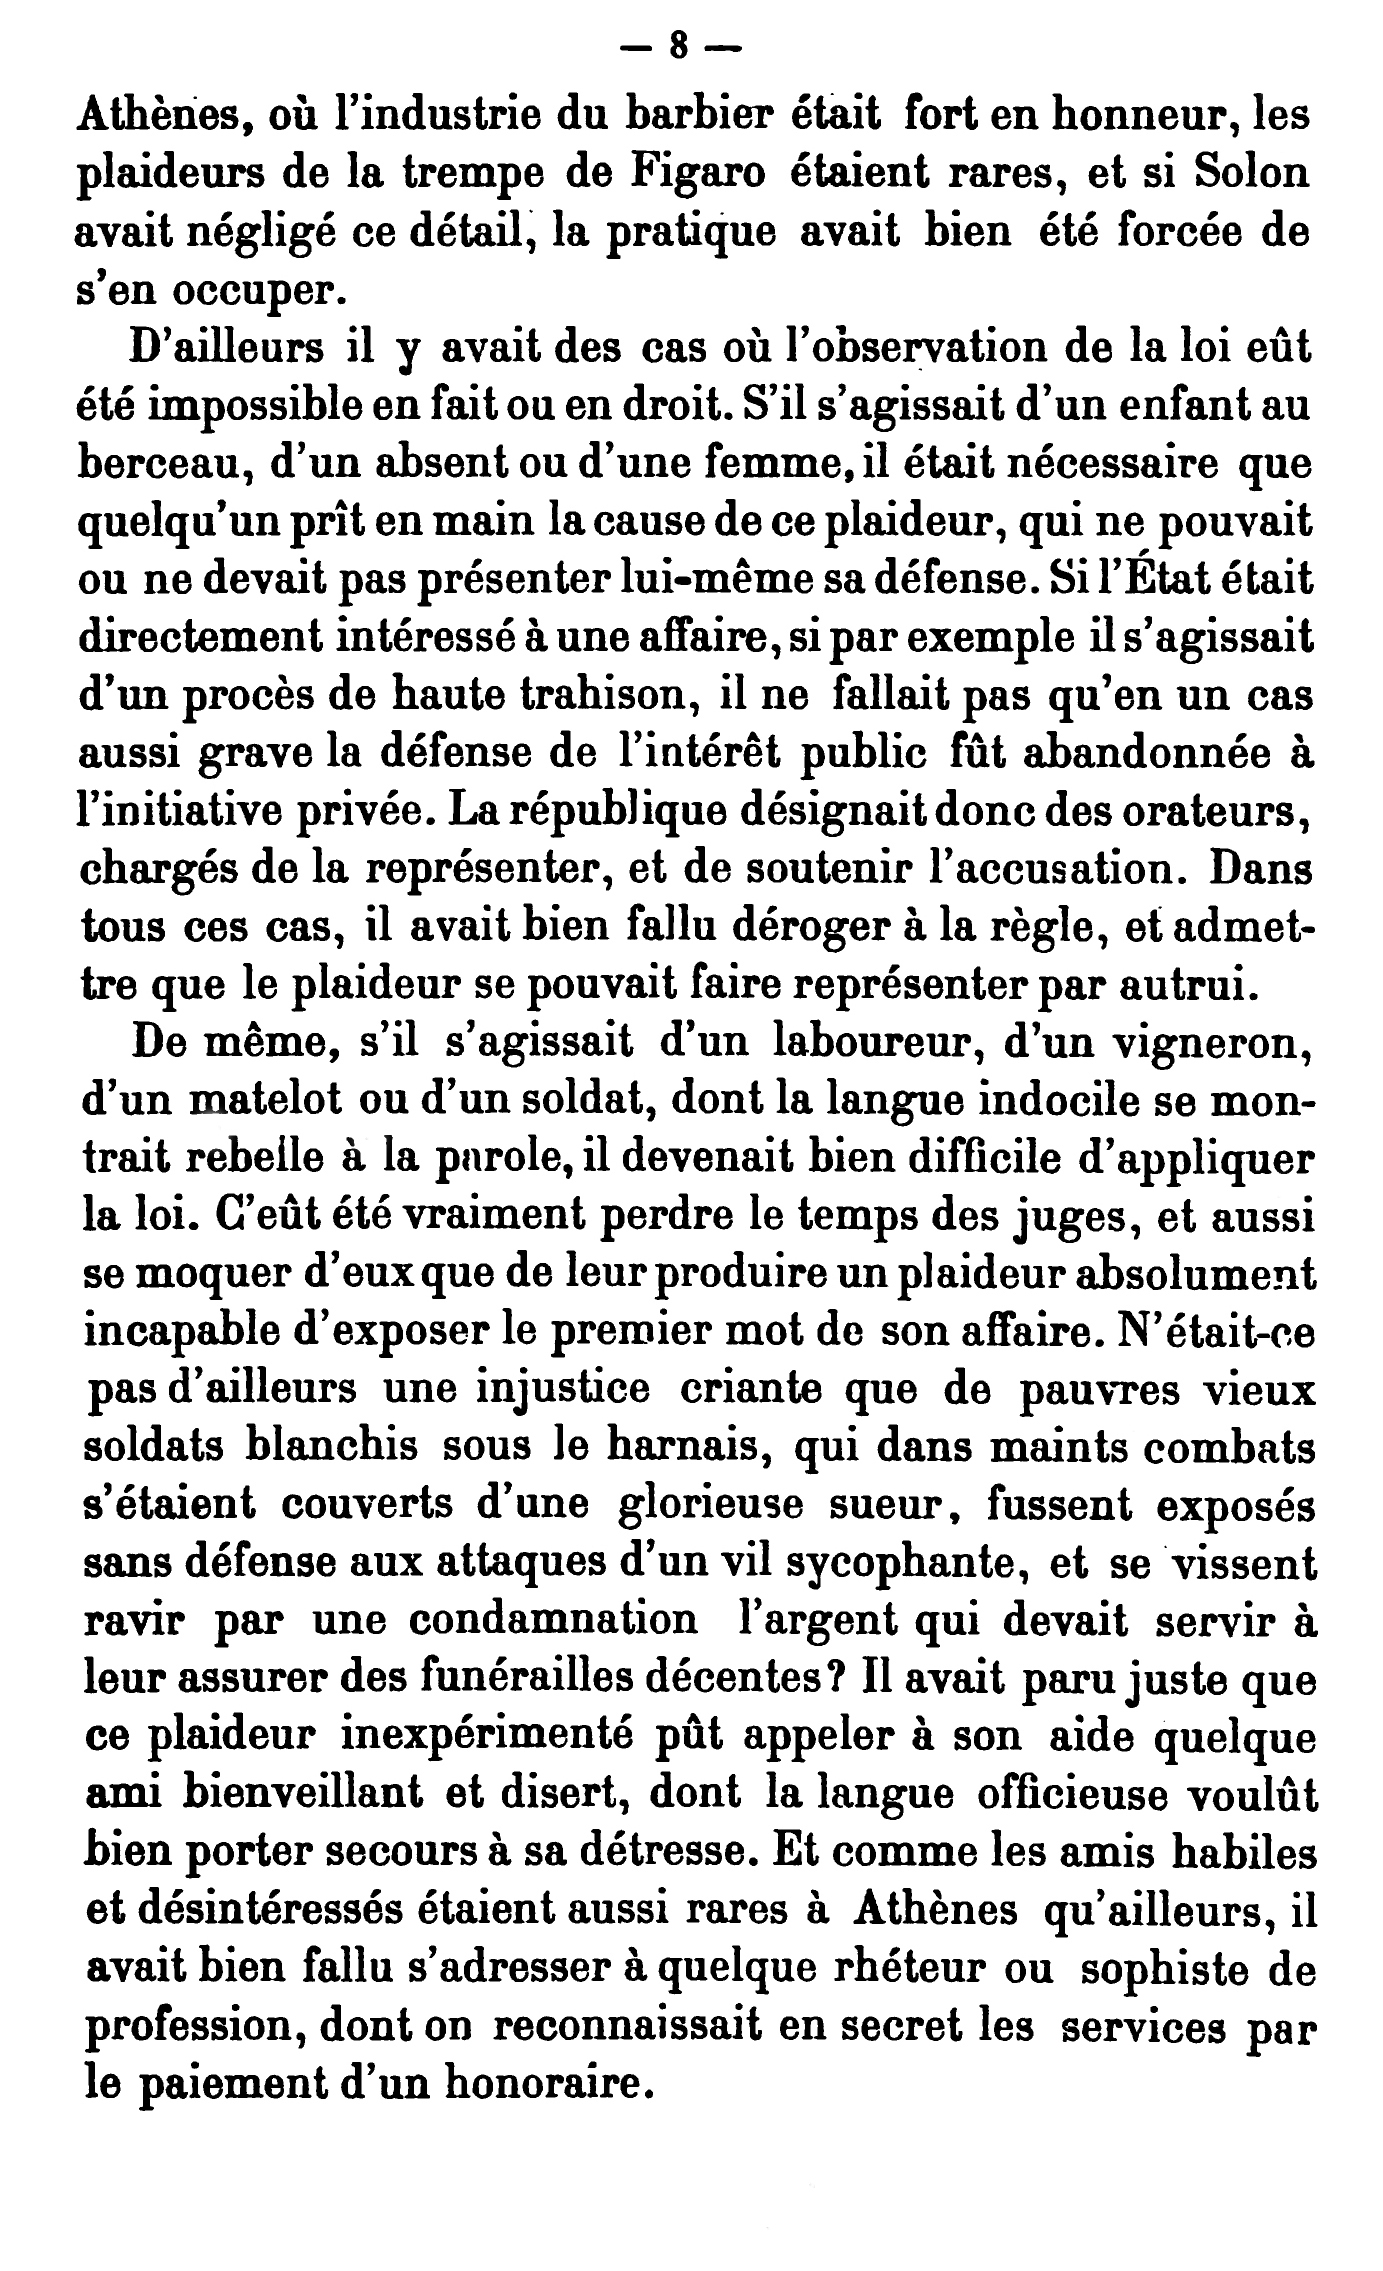

In [ ]:
fimg=cv2.imread('frenchtxt.jpg')
print(pytesseract.image_to_string(fimg, config=custom_config))

—3—
Athénes, ou l'industrie du barbier était fort en honneur, les
plaideurs de la trempe de Figaro étaient rares, et si Solon
avait négligé ce détail, la pratique avait bien été forcée de
s’en occuper.

D’ailleurs il y avait des cas ot l’observation de la loi eit
été impossible en fait ou en droit. S’'il s’agissait d’un enfant au
berceau, d’un absent ou d’une femme, il était nécessaire que
quelqu’un prit en main la cause de ce plaideur, qui ne pouvait
ou ne devait pas présenter lui-méme sa défense. Sil’Etat était
directement intéressé a une affaire, si par exemple ils’agissait
d’un procés de haute trahison, il ne fallait pas qu’en un cas
aussi grave la défense de l’intérét public fit abandonnée &
Vinitiative privée. La république désignait donc des orateurs,
chargés de la représenter, et de soutenir l’accusation. Dans
tous ces cas, il avait bien fallu déroger a la régle, et admet-
tre que le plaideur se pouvait faire représenter par autrui.

De méme, s’il s’agissait d’un laboureur, d’u

---
#### More, Complex examples

Let us take a more complex example now. We shall try working on the following image.

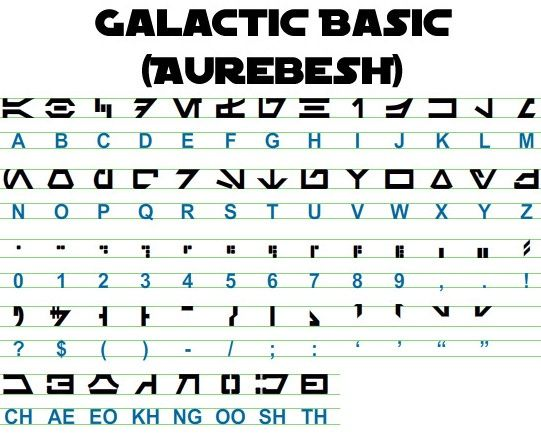

let us import it first :-

In [ ]:
img2 = cv2.imread('image.jpg')

##### Image preprocessing

Sometimes the images needed to be transcripted are not clear, and need to be proccessed like any data set to be more receptive towards the ocr.
This is where the cv2 library comes in. We shall use it to preproccess.
Our current usecase image requires such processing too. First, lets try running tesseract on it and see the result. Then run preprocessing on it, and then compare the results.

In [ ]:
print(pytesseract.image_to_string(img2, config=custom_config))

GALACTIC BASIC
(AUREBESH)
RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH



As you can see, most of the readable text on the image has not been correctly transcribed. Let us run preprocessing on it.

In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


gray = get_grayscale(img2)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

The processing resulted in the following changes in the image

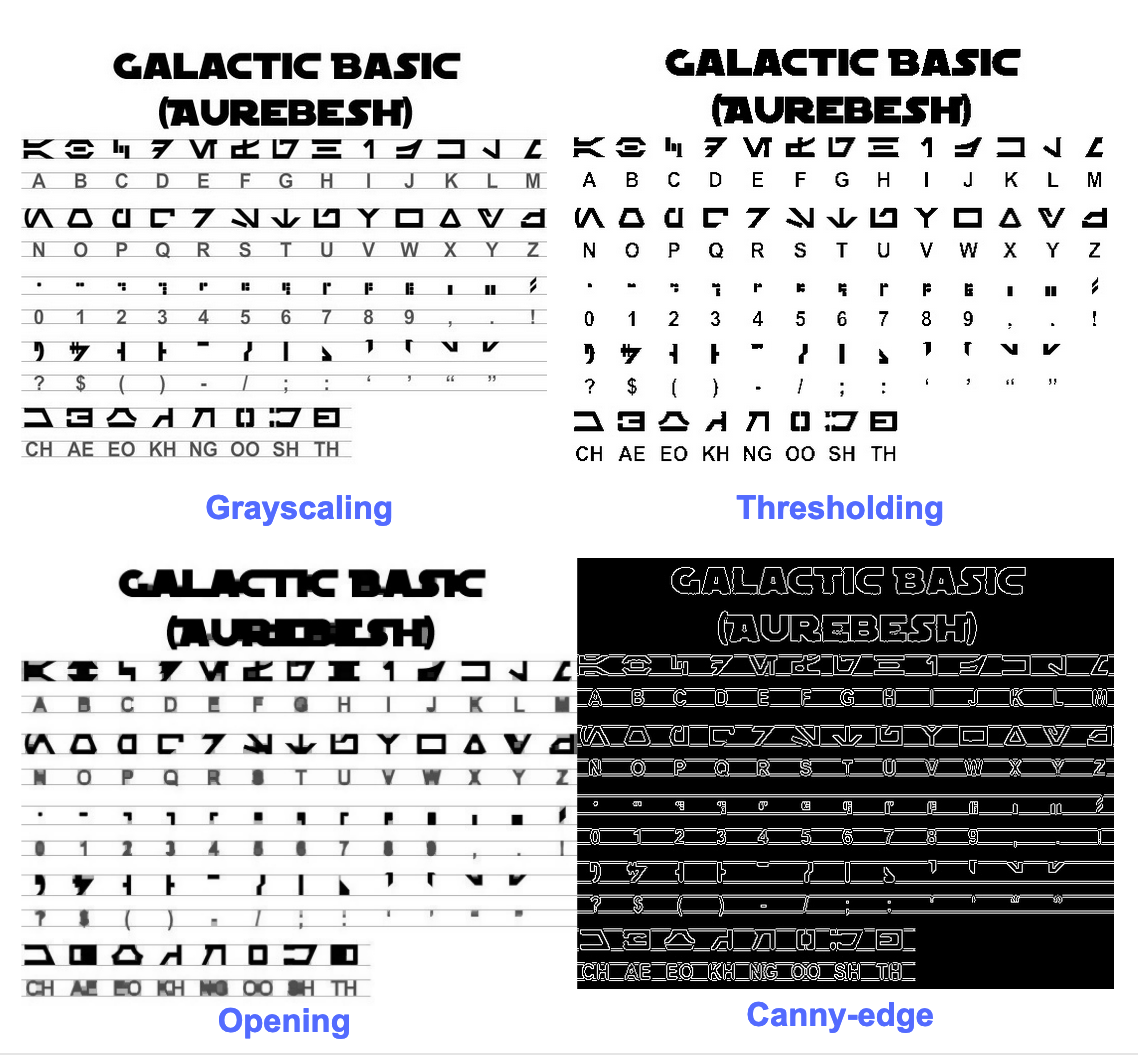

Lets run tesseract on these new images and then observe the new results.

First, the grayscaling -

In [ ]:
print(pytesseract.image_to_string(gray, config=custom_config))

GALACTIC BASIC
(AUREBESH)
REehHTFVMVEVEITZIoIN EL
A 2S > EE eS A ek oe
AOder7NVYoYoAVaA
NOP RS Tn wee
‘ss 4 oe 8 g Pf fF f 4 mw 4
Sea
7 77 Ty
2S ys ee
ASaSAnNADI
CH AE EO KH NG OO SH TH



Not so good. Now lets the the thresholding's result.

In [ ]:
print(pytesseract.image_to_string(thresh, config=custom_config))

GALACTIC BASIC
(AVREBESH)
RS 7FVMeEVEi1i fol Z
A B C DE F GH IJ K LM
AOdCeUT7TNVTOoOYOAVA
N OO P Q@R S$ TU VW XK Y¥ Z
"os 3 3 rm 8 fo Pf F Bo a om #
0 12 3 4 5 6 7 8 9 , . !
i A rd re
2 S$ ( Foe Fo gor ht roe
AadSANDIe
CH AE EO KH NG OO SH TH



All the readable characters from the image get transcribed when we used the thresholded image. Hence we can definitely say that preprocessing is in more cases crucial for a better result. But its also important to process the image correctly. Lets continue and try a few more processed results. 

Lets observe the opening's result

In [ ]:
print(pytesseract.image_to_string(opening, config=custom_config))

GALACTIC BASIC
(AUREZBEILSH)
KEE VTMEUEiwoayvs
A BC D FE F @ H [| J K CL
AOadr7WTt HYOAYV 4
WO P Q R 8S T U VW WK y Z
‘5 a aor es ln lp le ce
1 2 a a4 8 8 7 Sb Ps,
VY itr-~ -yrp»pTttYY
2 ty ee eg Ee Se
AGoOAnNnoOIH
CH AE BO KH @@ OO BH TH



As we can see, the transciption quality has fallen.

Lets try the last processing, canny's result -

In [ ]:
print(pytesseract.image_to_string(canny, config=custom_config))

CAA Cnr ASG
(KUREBESE?
SA
a SS
{o_o RS a
a
a a A : rc
| A |
a
eA Ao
erm emc om Cm cuOcmc (mim



The results are even worse than the preprocessed image. Clearly, the thresholded image resulted in the best accuracy.

#### Use cases

Image text extraction can be used for various applications

- It can be used for Data Entry for Business,
- Number Plate Recognition,
- Automated Passport Recognition,
- Quick Document Verification,
- IoT Application, Task Automation,
- Converting old books into ebooks and saving them electronically,
- Reading receipts, Road signs, and many more. 

Basically, any application which has a need to extract text from an image.

### In Conclusion

Image text extraction technology has various use cases, and can be applied to varied fields providing a boost in one way or other. Coupled with its ease of use, its safe to say that its an excellent technology, worth investing in, and that it is here to stay.